In [3]:
import pandas as pd

In [4]:
import numpy as np

In [40]:
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\mei88\OneDrive\桌面\MBAN 6110S-Data Science\assignment1\sales_data.csv")

In [6]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [8]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


In [9]:
#add a column "Sales"
df["Sales"] = df["Price"] *df["Units Sold"]

In [10]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales
0,NaN,Region_6,75.96,10.0,2022-01-01,759.60
1,NaN,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28,629.52
1046,Product_1,Region_6,NaN,8.0,2022-08-02,NaN
1047,Product_17,Region_2,114.37,11.0,2023-12-18,1258.07
1048,NaN,Region_8,NaN,5.0,2023-12-27,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
 5   Sales       850 non-null    float64
dtypes: float64(3), object(3)
memory usage: 49.3+ KB


In [18]:
# identify how many null rows for column 'Sales'
df["Sales"].isna().sum()

200

In [34]:
#remove all the rows for "sales" value is missing
df.dropna(subset=['Sales'], axis=0, inplace=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     850 non-null    object 
 1   Region      850 non-null    object 
 2   Price       850 non-null    float64
 3   Units Sold  850 non-null    float64
 4   Sale Date   850 non-null    object 
 5   Sales       850 non-null    float64
dtypes: float64(3), object(3)
memory usage: 46.5+ KB


In [36]:
# fillin missing value in "Region" as "Other"
df['Region'] = df['Region'].fillna("Other")

In [37]:
df.describe(include="all")

,Product,Region,Price,Units Sold,Sale Date,Sales
count,850,850,850.000000,850.000000,850,850.000000
unique,51,11,NaN,NaN,809,NaN
top,Other,Region_9,NaN,NaN,2022-09-19,NaN
freq,84,94,NaN,NaN,2,NaN
mean,NaN,NaN,107.167353,10.016471,NaN,1046.778047
std,NaN,NaN,125.098715,3.115705,NaN,1159.526160
min,NaN,NaN,0.200000,2.000000,NaN,0.990000
25%,NaN,NaN,29.315000,8.000000,NaN,260.310000
50%,NaN,NaN,76.775000,10.000000,NaN,696.010000
75%,NaN,NaN,142.512500,12.000000,NaN,1433.587500


<Axes: xlabel='Region', ylabel='Sales'>

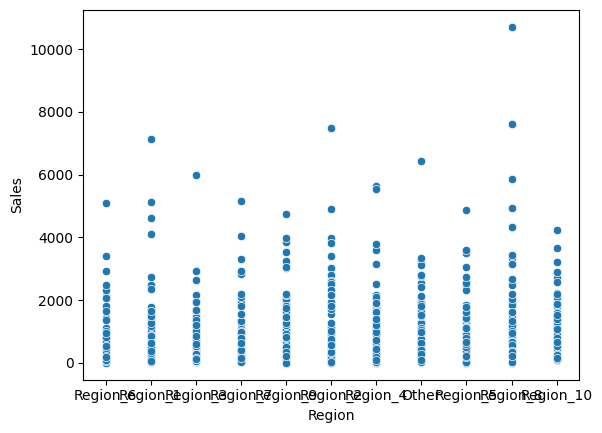

In [41]:
# identify outliers , sales =10716.5
sns.scatterplot(data=df, x="Region", y="Sales")

<Axes: xlabel='Region', ylabel='Sales'>

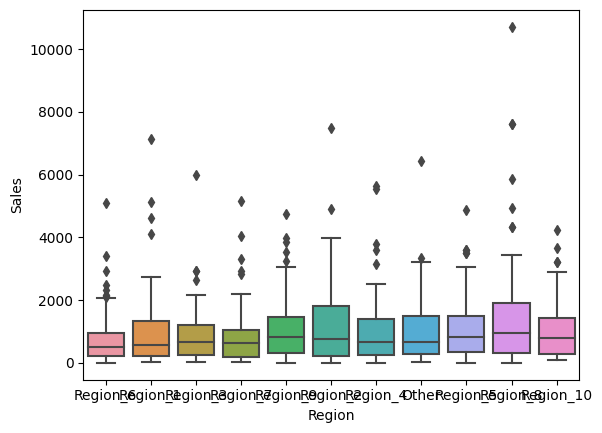

In [46]:
# from the boxplot, I decided to remove the values of "Sales" > 4000. 
sns.boxplot(data=df, x="Region", y="Sales")

In [50]:
# drop outliers
df_outliers = df[df['Sales'] >= 4000]

In [51]:
print(df_outliers)

         Product     Region    Price  Units Sold   Sale Date     Sales
119   Product_35      Other   401.31        16.0  2022-04-30   6420.96
189   Product_35   Region_1   511.74        10.0  2022-07-09   5117.40
264   Product_14   Region_7   517.29        10.0  2022-09-22   5172.90
275   Product_16   Region_4   433.17        13.0  2022-10-03   5631.21
276   Product_48   Region_8   418.24        14.0  2022-10-04   5855.36
437   Product_26   Region_8   585.17        13.0  2023-03-14   7607.21
526   Product_31   Region_4   505.01        11.0  2023-06-11   5555.11
546   Product_14   Region_9   338.95        14.0  2023-07-01   4745.30
551   Product_50   Region_8   447.75        11.0  2023-07-06   4925.25
670    Product_8  Region_10   352.86        12.0  2023-11-02   4234.32
696        Other   Region_5   487.81        10.0  2023-11-28   4878.10
728   Product_31   Region_3   665.00         9.0  2023-12-30   5985.00
743   Product_30   Region_1   385.96        12.0  2024-01-14   4631.52
796   

In [55]:
df.drop(df[df["Sales"] >= 4000].index, inplace=True)

In [56]:
df

,Product,Region,Price,Units Sold,Sale Date,Sales
0,Other,Region_6,75.96,10.0,2022-01-01,759.60
1,Other,Region_1,175.78,8.0,2022-01-02,1406.24
2,Product_46,Region_3,20.43,12.0,2022-01-03,245.16
3,Product_36,Region_1,12.77,10.0,2022-01-04,127.70
4,Product_17,Region_6,125.69,6.0,2022-01-05,754.14
...,...,...,...,...,...,...
1043,Product_20,Region_6,58.50,9.0,2022-10-06,526.50
1044,Product_48,Region_10,23.57,6.0,2024-02-28,141.42
1045,Product_45,Region_7,78.69,8.0,2022-07-28,629.52
1047,Product_17,Region_2,114.37,11.0,2023-12-18,1258.07


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 1049
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     827 non-null    object 
 1   Region      827 non-null    object 
 2   Price       827 non-null    float64
 3   Units Sold  827 non-null    float64
 4   Sale Date   827 non-null    object 
 5   Sales       827 non-null    float64
dtypes: float64(3), object(3)
memory usage: 45.2+ KB


<Axes: xlabel='Region', ylabel='Sales'>

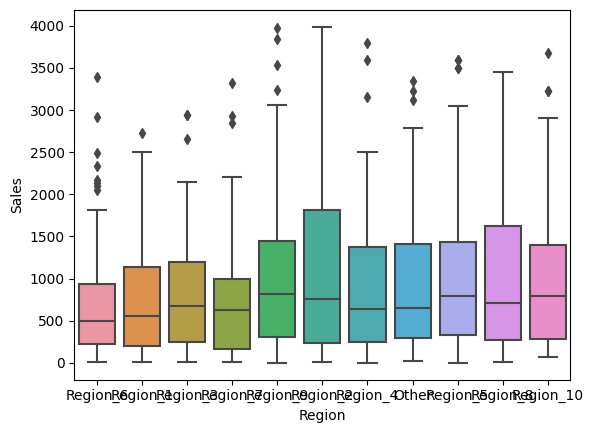

In [58]:
#rerun boxplot
sns.boxplot(data=df, x="Region", y="Sales")